# Profiling Different Types of Abscences

## Introduction

The goal is to create a profiling scheme by classifying the types of workers and their recorded absences at a Brazilian courier company using information about the workers and employment details. This data was pulled from the UCI machine learning [repo](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work). Each row contains a single instance of a recorded absence, and the columns contain details about the worker and his/her employment.



In [2]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
absences = pd.read_csv('./Absenteeism_at_work.csv', sep= ';')

In [4]:
absences.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


Note that a lot of predictors in the table have values that are encoded on the repository (e.g.  the `seasons` column has values `1,2,3,4` that correspond to the season in which the absence took place - `summer (1), autumn (2), winter (3), spring (4)`). The full description of the encoded values can be found on the  [repo](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work).

# Exploratory Data Analysis and Data Storytelling

First we can easily verify that every column has exactly 740 entries of the absences of the 36 employees, so none of the data has a `NaN` value. However, it appears that a few of the months and reason for absences have been enterd as 0, so we don't know exactly what that month those entries refer to. Do note that the height, weight, and distance from work are recorded in centimeters, kilograms, and kilometers, respectively. 

In [5]:
absences.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


First, let's check the weights, heights, and BMIs of the employees who reported sick.

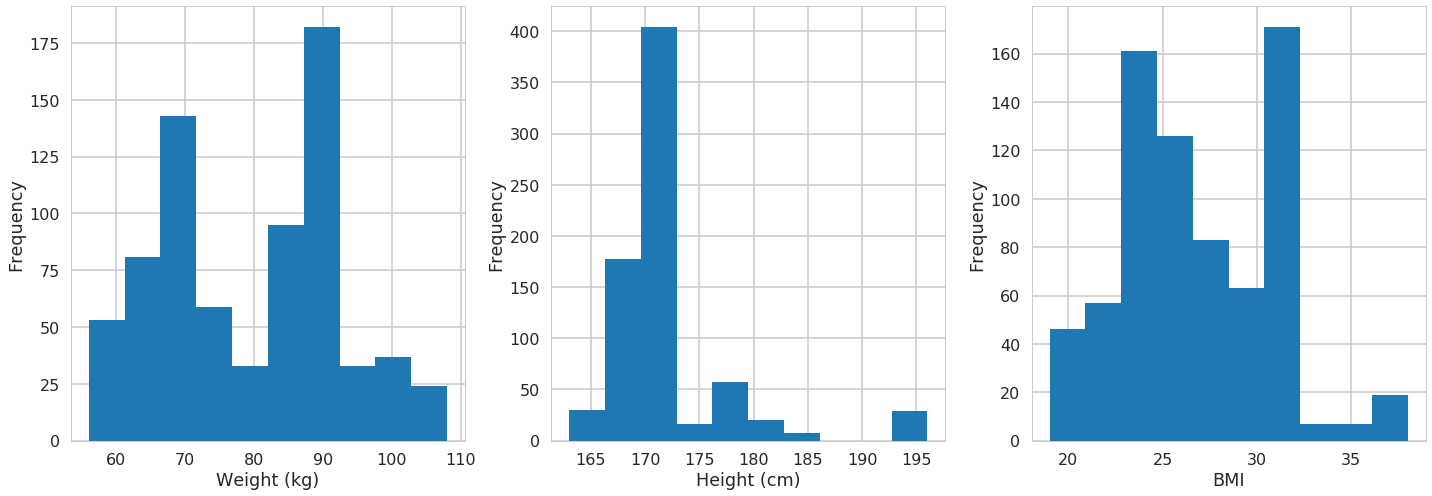

In [6]:
#sns.countplot(absences['Body mass index'])

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)

plt.hist(absences['Weight'])
plt.ylabel('Frequency')
plt.xlabel('Weight (kg)')

plt.subplot(1,3,2)

plt.hist(absences['Height'])
plt.ylabel('Frequency')
plt.xlabel('Height (cm)')

plt.subplot(1,3,3)

plt.hist(absences['Body mass index'])
plt.ylabel('Frequency')
plt.xlabel('BMI')


plt.tight_layout()


plt.show()

Interesting! We expect metrics like weight, height, and BMI to be approximately normal, but both weight and BMI appear to have a bimodal curve, and height looks a bit skewed right.

Now we let's examine what days people tended to call in sick the most:

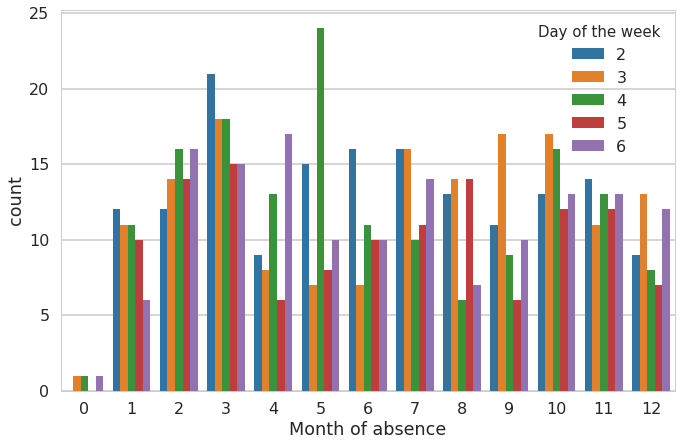

In [7]:
plt.figure(figsize=(11,7)) 
sns.countplot(x='Month of absence', hue='Day of the week', data=absences)
plt.show()


Immediately, we see that for the first 8 months of the year, the most common days of absence were typically Monday (day 2) or Friday (day 6). The last four months of the year features Tuesday (day 3) as a common day of absence, although Monday/Friday absences are still pretty frequent. The month of May features Wednesday as an extremely popular day of absence. 

What about the popularity of the reasons for absences?

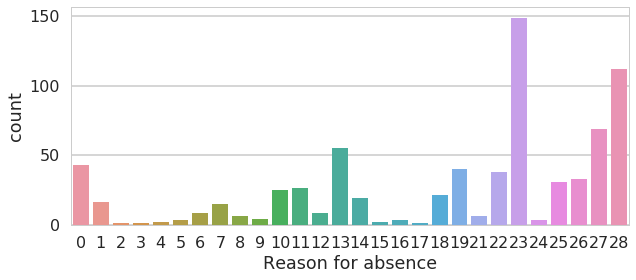

In [8]:
plt.figure(figsize=(10,4)) 
ax1 = sns.countplot(absences['Reason for absence'])
ax1.set_xticklabels(ax1.get_xticklabels(), ha="center")
plt.show()

We see that medical consultation(23) and dental consultation(28) are by far the most popular reasons given, followed by physiotherapy(27), diseases of the musculoskeletal system and connective tissue (13), laboratory examinations (24) and unjustied absence(25). Now let's take a look at how long the absences were for each of these illnesses:

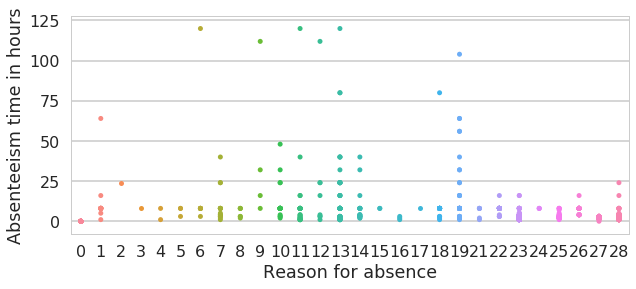

In [9]:
#which types of absencces are the longest?
plt.figure(figsize=(10,4)) 
ax2 = sns.stripplot(x="Reason for absence", y="Absenteeism time in hours", data=absences)
plt.show()

Refering back to the data info in the repo: the last seven reasons for absence (22 through 28) were not attested by the International Code of Diseases (ICD), while reasons 1 through 21 were. Note these last seven reasons had all absences take less than 24 hours, while the first 21 types of absences have lengthier occurences.

## Is there any relationship between Education level and length of absence?

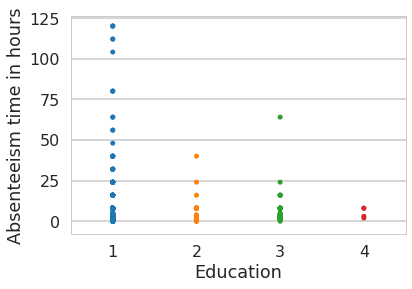

In [10]:
sns.stripplot(absences['Education'],absences['Absenteeism time in hours'])
plt.show()

It appears that as the level of education gets higher, the length of the absence tends to go down. However, we note that this also might be due to there simply being more instances of education level 1 than 2, 2 than 3, and so on. If we were to test specific education level means, we could again use the t-test, or we could use a multiple comparison test if we wanted to simulaneously compare groups.

Let's conduct a t-test to see if at least one of the group means is different from the others:

$$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$$
$$H_A: \text{At least one of the means is different from the others}$$

In [11]:
from scipy import stats

edu_t=stats.ttest_ind(absences['Education'].astype(object),absences['Absenteeism time in hours'], equal_var=False)
print("The p-value is ",edu_t[1])

The p-value is  3.4268635390471765e-28


So from the above t-test, we conclude that at least one of the means of the four different education groups is different from the others, as a p-value of $3.43*10^{-28}< \alpha=0.05$.

## Are there correlations between Absence Times and any of the other predictors?

Let's try to see if we can find any variables that have high correlation with Absence Time:

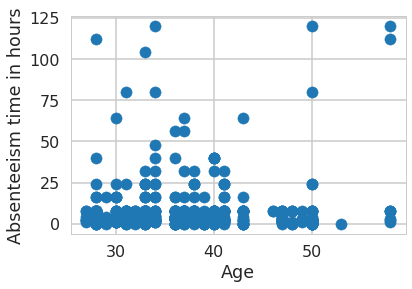

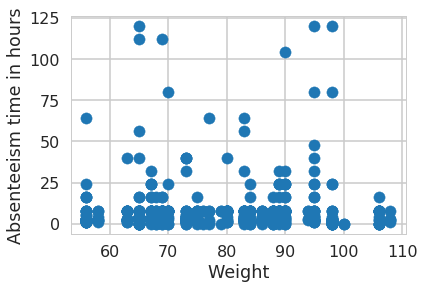

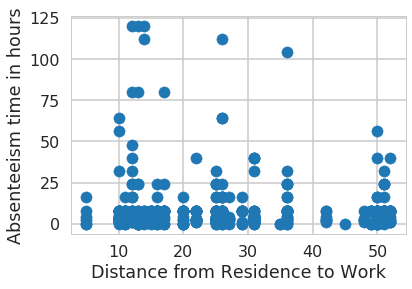

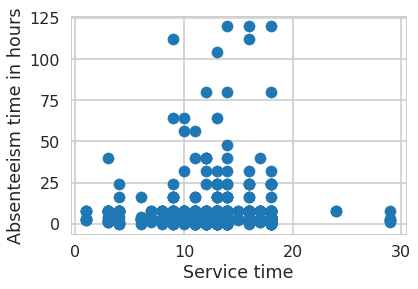

In [12]:
plt.scatter(absences['Age'], absences['Absenteeism time in hours'])
plt.xlabel('Age')
plt.ylabel('Absenteeism time in hours')
plt.show()

plt.scatter(absences['Weight'], absences['Absenteeism time in hours'])
plt.xlabel('Weight')
plt.ylabel('Absenteeism time in hours')
plt.show()

plt.scatter(absences['Distance from Residence to Work'], absences['Absenteeism time in hours'])
plt.xlabel('Distance from Residence to Work')
plt.ylabel('Absenteeism time in hours')
plt.show()

plt.scatter(absences['Service time'], absences['Absenteeism time in hours'])
plt.xlabel('Service time')
plt.ylabel('Absenteeism time in hours')
plt.show()

Below is a table showing the Pearson correlation coefficients between Absence time and various predictors:


|              | Correlation Coeff with Absence Time |P-value(two-tailed) |
|--------------|-------------------------------------|--------------------|
|      Age     |                0.066                | .074 |
|    Weight    |                0.016                | .668 |
|   Distance   |                -0.088               | .016 |
| Service time |                0.019                | .605 |

It would appear that none of our proposed variables (age, weight, distance between residence and work, and service time) have a strong linear correlation to the absence time. However, we should note that there may be other types of correlations (e.g. quadratic) that would better capture the relationships.

### Individuals

In [13]:
categoricals = ['ID', 
                'Reason for absence',
                'Month of absence',
                'Day of the week',
                'Seasons',
                'Disciplinary failure',
                'Education',
                'Social drinker',
                'Social smoker'
                
               ]

#sumary df for each person.
df_personal = pd.DataFrame(columns = absences.columns)

summarized_list = []

#try seeing if there's a pattern for people who are sick a lot and people who aren't sick alot
IDlist = range(1,37)

from scipy import stats

for entry in IDlist:
    entry_data = []
    df_personalRecord = absences[absences.ID==entry]
    for column_name in df_personal.columns:
        if column_name in categoricals:
            entry_data.append(stats.mode(df_personalRecord[column_name])[0][0])
        else:
            entry_data.append(df_personalRecord[column_name].mean())
    summarized_list.append(entry_data)

        
df_personal = pd.DataFrame(summarized_list,columns = absences.columns)

df_personal

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,22,8,2,1,235.0,11.0,14.0,37.0,262.894478,...,0,3,1.0,0,0,1.0,88.0,172.0,29.0,5.260870
1,2,0,8,2,1,235.0,29.0,12.0,48.0,241.597000,...,0,1,1.0,0,1,5.0,88.0,163.0,33.0,4.166667
2,3,27,2,4,2,179.0,51.0,18.0,38.0,262.175062,...,0,1,0.0,1,0,0.0,89.0,170.0,31.0,4.265487
3,4,0,0,3,1,118.0,14.0,13.0,40.0,271.219000,...,0,1,1.0,1,0,8.0,98.0,170.0,34.0,0.000000
4,5,26,9,2,4,235.0,20.0,13.0,43.0,266.650632,...,0,1,1.0,1,0,0.0,106.0,167.0,38.0,5.473684
5,6,22,2,5,2,189.0,29.0,13.0,33.0,274.829000,...,0,1,2.0,0,0,2.0,69.0,167.0,25.0,9.000000
6,7,0,3,5,1,279.0,5.0,14.0,39.0,303.210833,...,0,1,2.0,1,1,0.0,68.0,168.0,24.0,5.000000
7,8,0,0,3,1,231.0,35.0,14.0,39.0,282.718000,...,0,1,2.0,1,0,2.0,100.0,170.0,35.0,0.000000
8,9,6,3,3,1,228.0,14.0,16.0,58.0,249.042250,...,0,1,2.0,0,0,1.0,65.0,172.0,22.0,32.750000
9,10,22,7,2,1,361.0,52.0,3.0,28.0,258.870250,...,0,1,1.0,1,0,4.0,80.0,172.0,27.0,7.750000


### Disciplinary failures

We see that every worker has a mode of 0 for disciplinary failures, so we conclude that even if a few failures were administered, they are very few, and do not occur consistently.

### Reason for absences

We see that quite a few people have the reason 0 as their most common reason for absence. While no code was given to the entry 0, it's probably best to assume in this case that no reason was supplied, or the main 28 reasons did not include the given reason. Furthermore, we note that of the people who had 0s as their most common absence reason were either in their early 30s or early 50s:


In [14]:
zero_abs = df_personal['Reason for absence'] == 0
df_personal[zero_abs]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,2,0,8,2,1,235.0,29.0,12.0,48.0,241.597000,...,0,1,1.0,0,1,5.0,88.0,163.0,33.0,4.166667
3,4,0,0,3,1,118.0,14.0,13.0,40.0,271.219000,...,0,1,1.0,1,0,8.0,98.0,170.0,34.0,0.000000
6,7,0,3,5,1,279.0,5.0,14.0,39.0,303.210833,...,0,1,2.0,1,1,0.0,68.0,168.0,24.0,5.000000
7,8,0,0,3,1,231.0,35.0,14.0,39.0,282.718000,...,0,1,2.0,1,0,2.0,100.0,170.0,35.0,0.000000
18,19,0,3,3,1,291.0,50.0,12.0,32.0,281.129000,...,0,1,0.0,1,0,0.0,65.0,169.0,23.0,2.000000
20,21,0,6,2,1,268.0,11.0,8.0,33.0,256.998000,...,0,2,0.0,0,0,0.0,79.0,178.0,25.0,5.333333
22,23,0,5,4,3,378.0,49.0,11.0,36.0,301.010000,...,0,1,2.0,0,1,4.0,65.0,174.0,21.0,5.000000
28,29,0,5,6,3,225.0,17.2,13.8,38.4,243.738600,...,0,4,1.8,1,0,2.0,89.0,179.4,27.2,4.200000
30,31,0,2,2,2,388.0,15.0,9.0,50.0,328.018000,...,0,1,0.0,0,0,0.0,76.0,178.0,24.0,5.333333
34,35,0,0,6,3,179.0,45.0,14.0,53.0,271.219000,...,0,1,1.0,0,0,1.0,77.0,175.0,25.0,0.000000


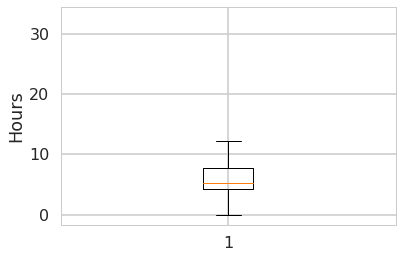

In [15]:
plt.boxplot(df_personal['Absenteeism time in hours'])
plt.ylabel('Hours')
plt.show()

From the above box-and-whiskers plot, we note that the workers whose most common reason for absence was reason 0 had a mean absences (in hours) on the lower side of the workers. 

### Correlation between age and service time per person

We see that there's a general positive correlation between age and service time: of course, we might expect this to be true, as older workers have a higher chance of being with a company for a longer period of time, while younger ones aren't as likely.

[]

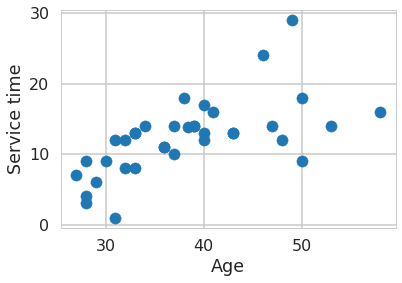

In [16]:
plt.scatter(df_personal['Age'], df_personal['Service time'])
plt.xlabel('Age')
plt.ylabel('Service time')
plt.plot()

### Correlation between Age and weight

We see that there is a pretty positive correlation between weight and age as well: as one increases, the other increases as well.

[]

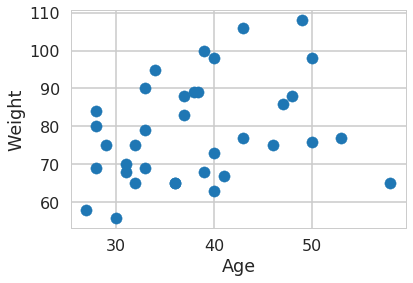

In [17]:
plt.scatter(df_personal['Age'],df_personal['Weight'])
plt.xlabel('Age')
plt.ylabel('Weight')
plt.plot()

### Investigating Absenteeism time

Are there any variables that correlate highly with absenteeism time?

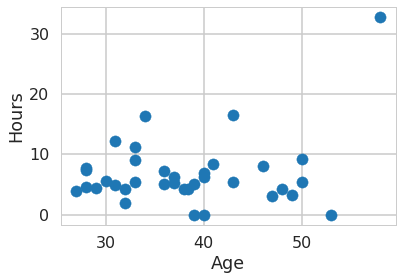

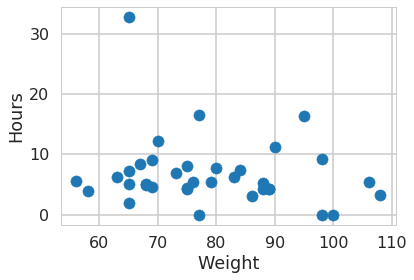

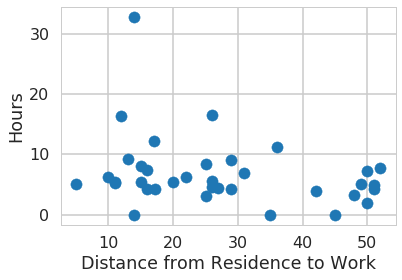

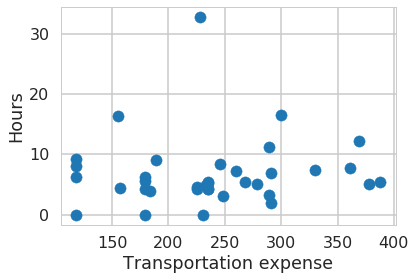

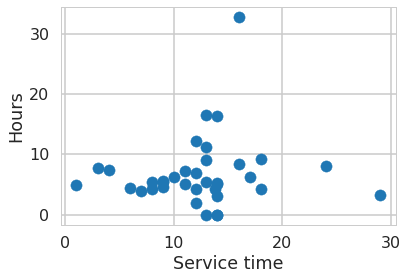

In [18]:
plt.scatter(df_personal['Age'], df_personal['Absenteeism time in hours'])
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

plt.scatter(df_personal['Weight'], df_personal['Absenteeism time in hours'])
plt.xlabel('Weight')
plt.ylabel('Hours')
plt.show()

plt.scatter(df_personal['Distance from Residence to Work'], df_personal['Absenteeism time in hours'])
plt.xlabel('Distance from Residence to Work')
plt.ylabel('Hours')
plt.show()

plt.scatter(df_personal['Transportation expense'], df_personal['Absenteeism time in hours'])
plt.xlabel('Transportation expense')
plt.ylabel('Hours')
plt.show()

plt.scatter(df_personal['Service time'], df_personal['Absenteeism time in hours'])
plt.xlabel('Service time')
plt.ylabel('Hours')
plt.show()

As shown above, it seems like that when we examine personal averages of absence hours with respect to averages of other variables, we can't find a discernible pattern, so we conclude that there isn't a specific variable that is highly correlated with long absences. Perhaps this is because these hours are aggregated per person and stored as an average.

# Profiling

Let's try to cluster our recorded absences. We will use one-hot encoding to handle our categorical data.

In [19]:
from sklearn.cluster import KMeans


In [20]:
#get dummies
absences_OHC = pd.get_dummies(absences, columns = categoricals)
absences_OHC.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,...,Disciplinary failure_0,Disciplinary failure_1,Education_1,Education_2,Education_3,Education_4,Social drinker_0,Social drinker_1,Social smoker_0,Social smoker_1
0,289,36,13,33,239.554,97,2,1,90,172,...,1,0,1,0,0,0,0,1,1,0
1,118,13,18,50,239.554,97,1,0,98,178,...,0,1,1,0,0,0,0,1,1,0
2,179,51,18,38,239.554,97,0,0,89,170,...,1,0,1,0,0,0,0,1,1,0
3,279,5,14,39,239.554,97,2,0,68,168,...,1,0,1,0,0,0,0,1,0,1
4,289,36,13,33,239.554,97,2,1,90,172,...,1,0,1,0,0,0,0,1,1,0


Note how categorical variables have been split: for example, Education has been split into four columns for each of its levels (1,2,3,4) and each of these columns is used as an indicator to determine the level of education for a row.

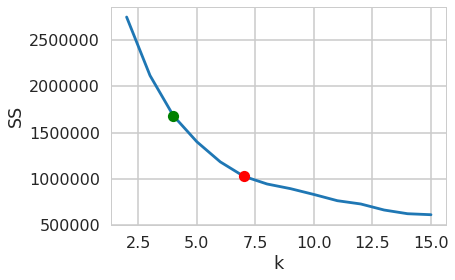

In [21]:
clusterRange = list(range(2,16))
pred_cols = absences_OHC.values
SS_list = []

for k in clusterRange:
    kmeans = KMeans(n_clusters=k,random_state=9).fit(pred_cols)
    SS_list = SS_list + [kmeans.inertia_]
    
plt.plot(clusterRange,SS_list)
plt.xlabel("k")
plt.ylabel("SS")
plt.plot(7, SS_list[5], 'ro')
plt.plot(4, SS_list[2], 'go')
plt.show()

Using the elbow method, we see that there is no apparent 'elbow', so we might initially select $k=7$ or $k=4$ clusters. In this case, we select 4 clusters as generally speaking, it's easier to find differences between groups(clusters) if there are fewer groups to compare. 

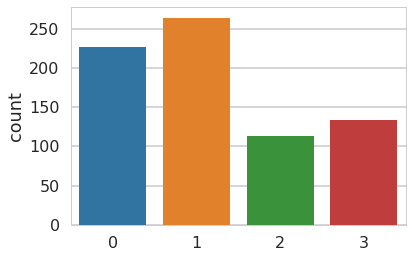

In [22]:
kmeans4 = KMeans(n_clusters=4,random_state=9).fit(pred_cols)

kmeans4_counts=sns.countplot(kmeans4.labels_)

plt.show()

absences['labels'] = kmeans4.labels_

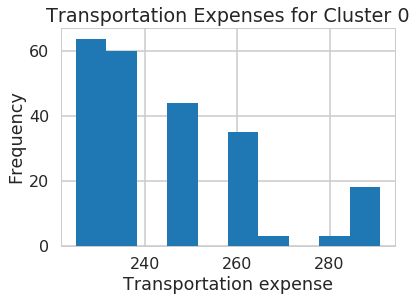

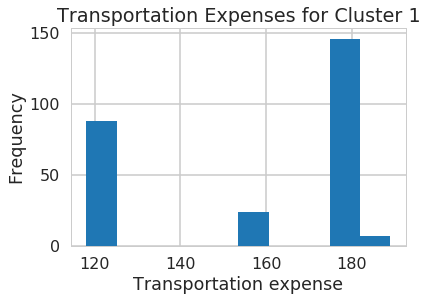

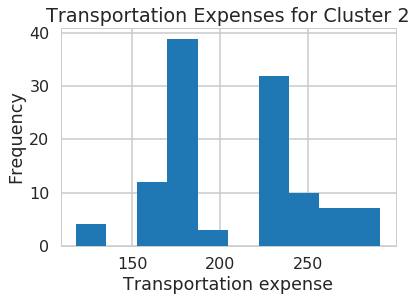

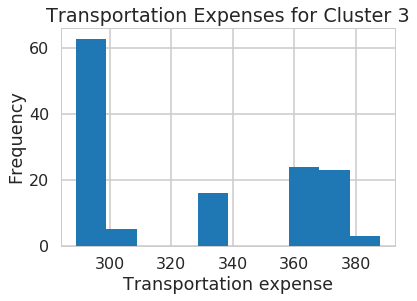

In [23]:
for val in sorted(absences.labels.unique()):
    plt.figure()
    plt.xlabel('Transportation expense')
    plt.ylabel('Frequency')
    plt.title('Transportation Expenses for Cluster %s' %val)
    plt.hist(absences[absences['labels']==val]['Transportation expense'])
    

Based on the transportation expenses, we can see a clear difference in the distributions among the groups: group 1 has mostly sub-200 expenses, group 3 has mostly expenses over 300, group 0 has mostly entries in the 200 to 260 range, while group 2 has expenses (1) around 175 and (2) over 225.

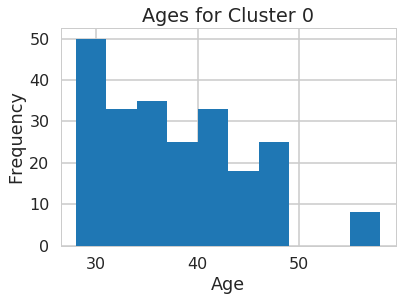

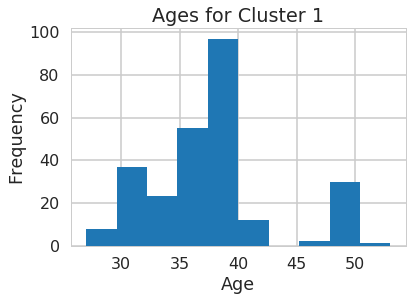

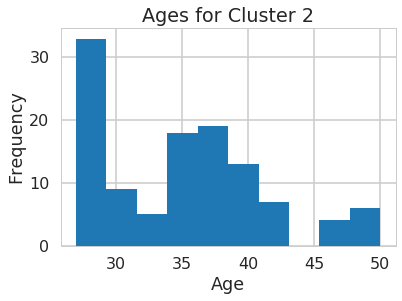

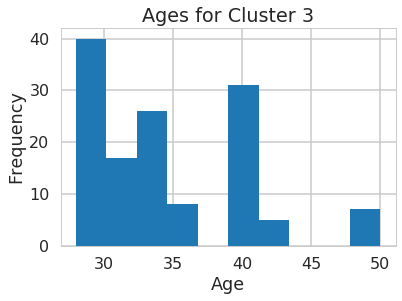

In [24]:
for val in sorted(absences.labels.unique()):
    plt.figure()
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Ages for Cluster %s' %val)
    plt.hist(absences[absences['labels']==val]['Age'])

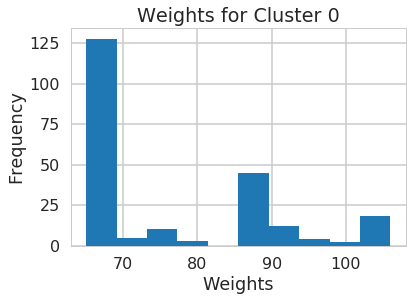

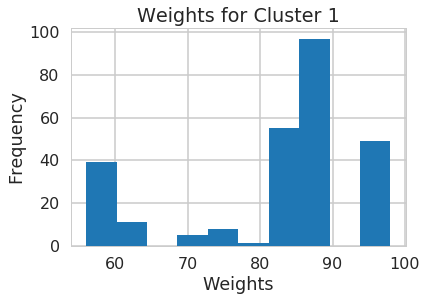

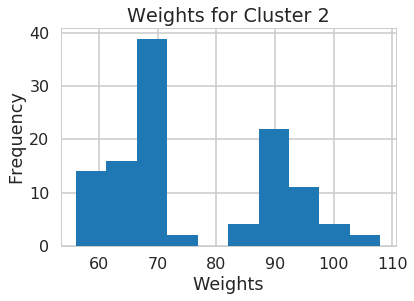

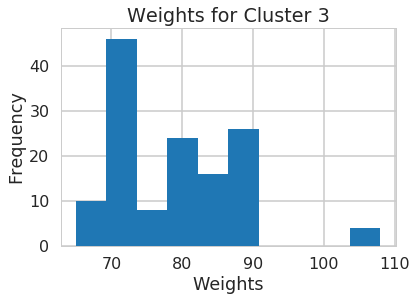

In [25]:
for val in sorted(absences.labels.unique()):
    plt.figure()
    plt.xlabel('Weights')
    plt.ylabel('Frequency')
    plt.title('Weights for Cluster %s' %val)
    plt.hist(absences[absences['labels']==val]['Weight'])

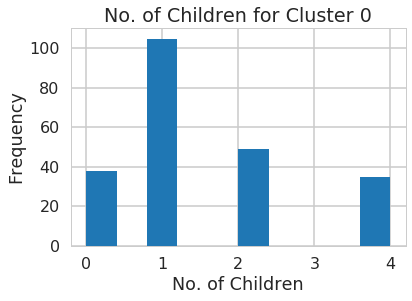

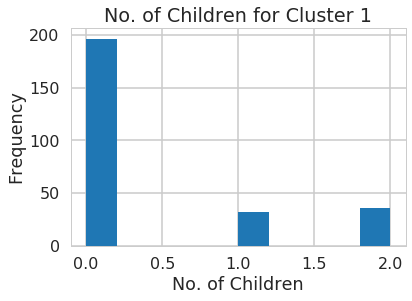

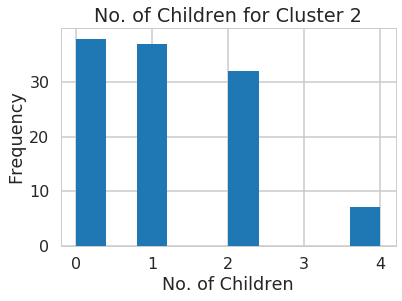

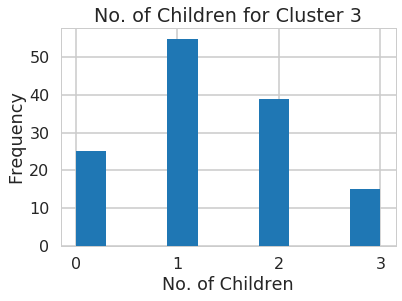

In [26]:
for val in sorted(absences.labels.unique()):
    plt.figure()
    plt.xlabel('No. of Children')
    plt.ylabel('Frequency')
    plt.title('No. of Children for Cluster %s' %val)
    plt.hist(absences[absences['labels']==val]['Son'])

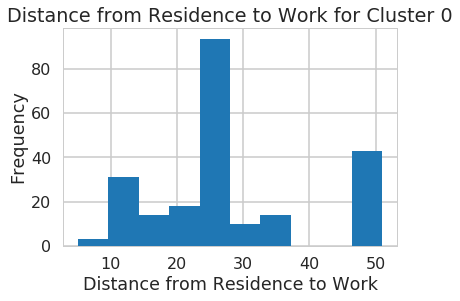

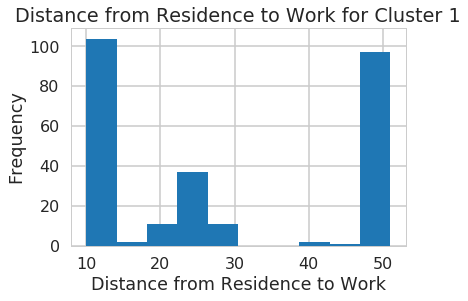

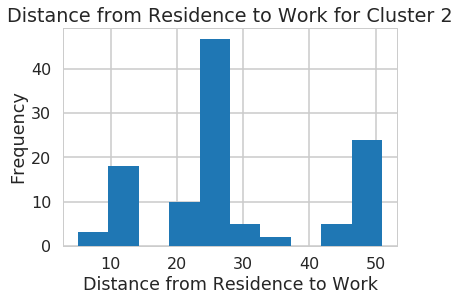

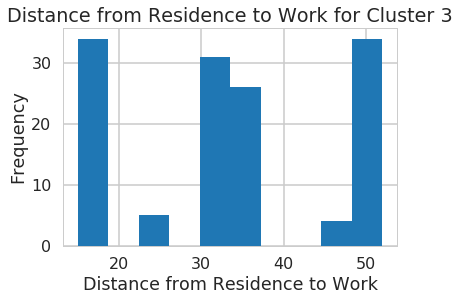

In [27]:
for val in sorted(absences.labels.unique()):
    plt.figure()
    plt.xlabel('Distance from Residence to Work')
    plt.ylabel('Frequency')
    plt.title('Distance from Residence to Work for Cluster %s' %val)
    plt.hist(absences[absences['labels']==val]['Distance from Residence to Work'])

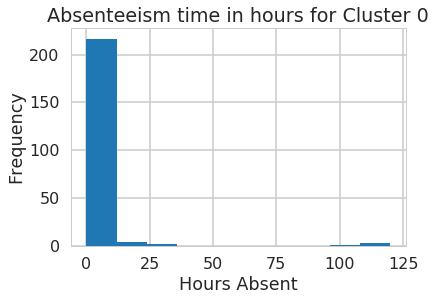

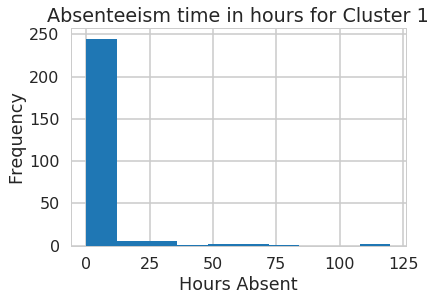

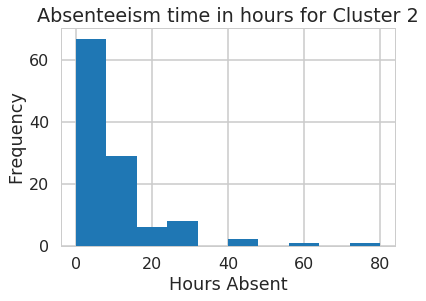

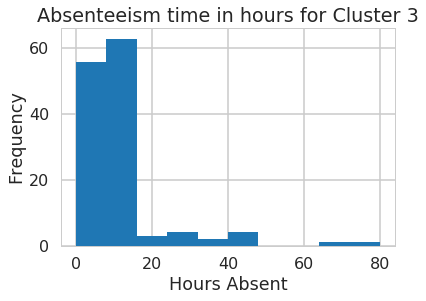

In [28]:
for val in sorted(absences.labels.unique()):
    plt.figure()
    plt.xlabel('Hours Absent')
    plt.ylabel('Frequency')
    plt.title('Absenteeism time in hours for Cluster %s' %val)
    plt.hist(absences[absences['labels']==val]['Absenteeism time in hours'])

Below we present some features of our different clusters:


|  Cluster 0   | Cluster 1 | Cluster 2 | Cluster 3
|--------------|-------------------------------------|
|Late 20s|Under 200 Transportation expense|Between 150 and 200 Transportation expense|At least 300 transportation expense|
| Weighs right under 70kg |Late 30s to early 40s| Under 30 y.o| At least 10 hours absent|
| Has 1 Child|No Children| | |
| Between 0 and 10 hours absent |Between 80 and 90kg |  | |

# Individual Profiling

Instead of trying to categorize all instances of absences, let's try to cluster the workers themselves (who we can identify through their ID)

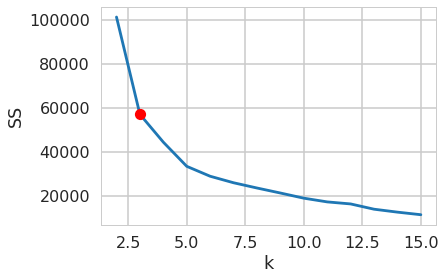

In [29]:

personals_OHC = pd.get_dummies(df_personal, columns=categoricals)
predpersonal_cols = personals_OHC.values
SSpersonal_list = []

for k in clusterRange:
    kmeans = KMeans(n_clusters=k,random_state=9).fit(predpersonal_cols)
    SSpersonal_list = SSpersonal_list + [kmeans.inertia_]
    
plt.plot(clusterRange,SSpersonal_list)
plt.xlabel("k")
plt.ylabel("SS")
plt.plot(3, SSpersonal_list[1], 'ro')
plt.show()

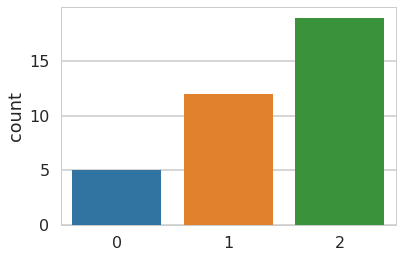

In [31]:
kmeans3 = KMeans(n_clusters=3,random_state=9).fit(predpersonal_cols)

kmeans3_counts=sns.countplot(kmeans3.labels_)

plt.show()

In [32]:
df_personal['labels'] = kmeans3.labels_

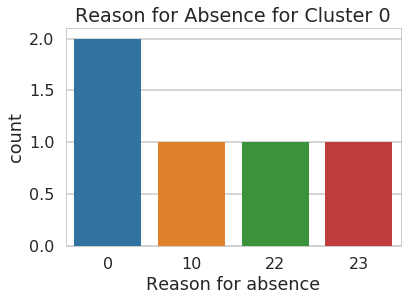

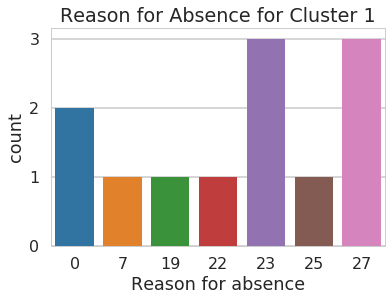

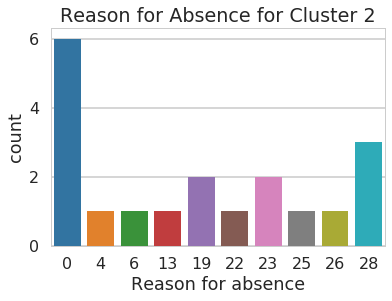

In [35]:
for i in range(0,3):
    plt.figure()
    sns.countplot(df_personal[df_personal['labels']==i]['Reason for absence'])
    plt.title('Reason for Absence for Cluster %d' %i)

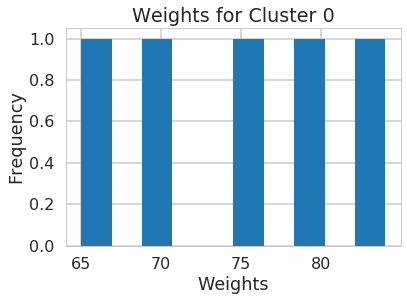

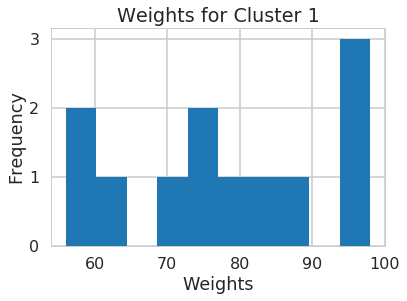

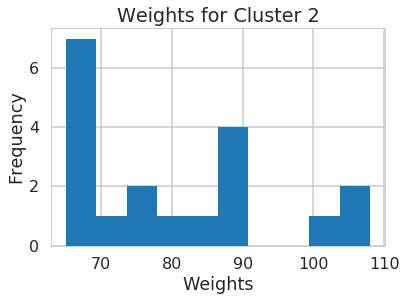

In [36]:
for val in sorted(df_personal.labels.unique()):
    plt.figure()
    plt.xlabel('Weights')
    plt.ylabel('Frequency')
    plt.title('Weights for Cluster %s' %val)
    plt.hist(df_personal[df_personal['labels']==val]['Weight'])

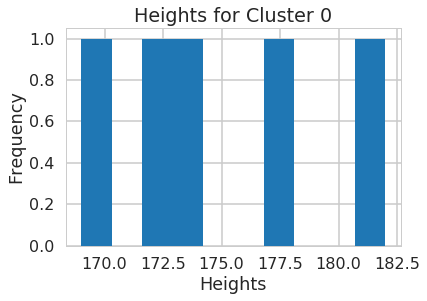

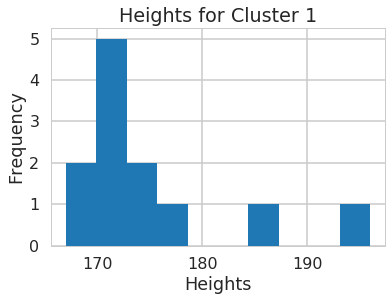

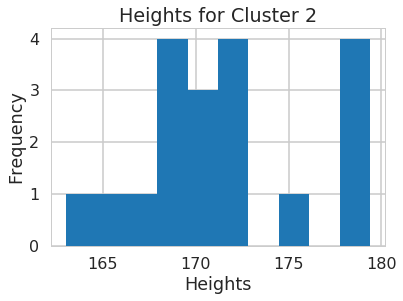

In [37]:
for val in sorted(df_personal.labels.unique()):
    plt.figure()
    plt.xlabel('Heights')
    plt.ylabel('Frequency')
    plt.title('Heights for Cluster %s' %val)
    plt.hist(df_personal[df_personal['labels']==val]['Height'])

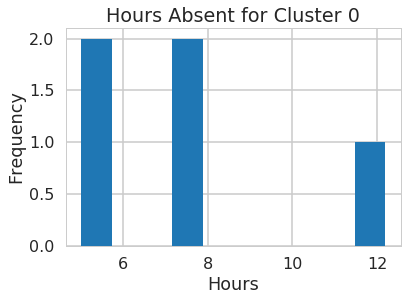

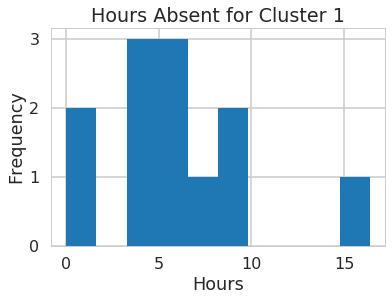

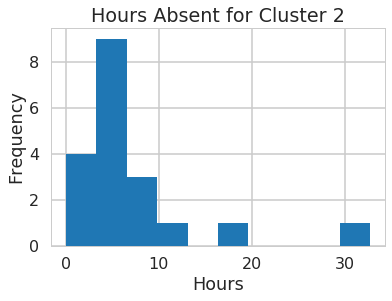

In [38]:
for val in sorted(df_personal.labels.unique()):
    plt.figure()
    plt.xlabel('Hours')
    plt.ylabel('Frequency')
    plt.title('Hours Absent for Cluster %s' %val)
    plt.hist(df_personal[df_personal['labels']==val]['Absenteeism time in hours'])

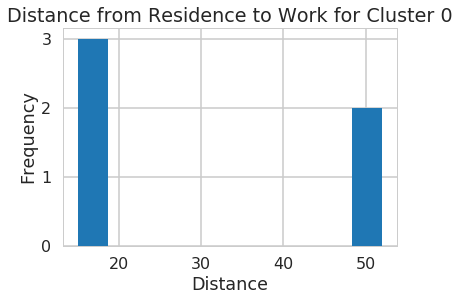

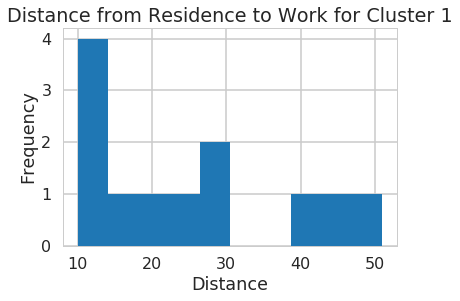

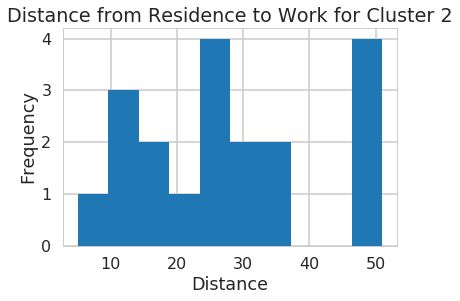

In [39]:
for val in sorted(df_personal.labels.unique()):
    plt.figure()
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title('Distance from Residence to Work for Cluster %s' %val)
    plt.hist(df_personal[df_personal['labels']==val]['Distance from Residence to Work'])

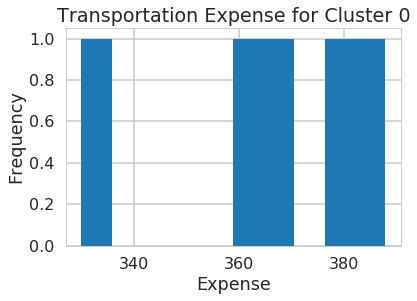

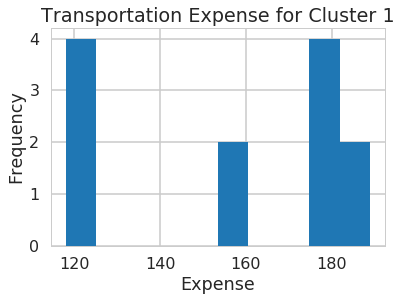

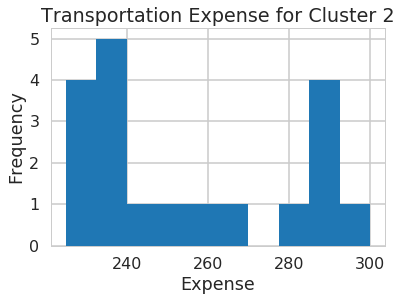

In [40]:
for val in sorted(df_personal.labels.unique()):
    plt.figure()
    plt.xlabel('Expense')
    plt.ylabel('Frequency')
    plt.title('Transportation Expense for Cluster %s' %val)
    plt.hist(df_personal[df_personal['labels']==val]['Transportation expense'])

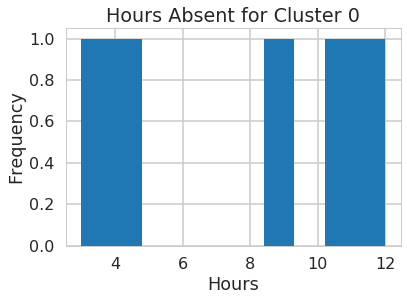

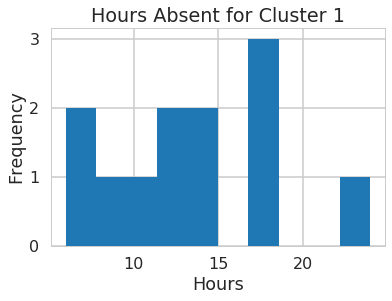

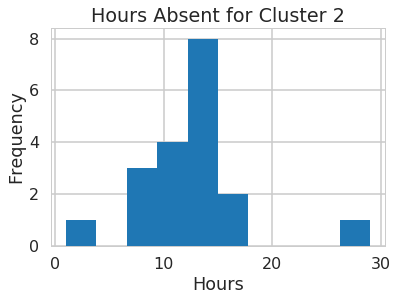

In [41]:
for val in sorted(df_personal.labels.unique()):
    plt.figure()
    plt.xlabel('Hours')
    plt.ylabel('Frequency')
    plt.title('Hours Absent for Cluster %s' %val)
    plt.hist(df_personal[df_personal['labels']==val]['Service time'])

Below we present some features of our different clusters:


|  Cluster 0   | Cluster 1 | Cluster 2 |
|--------------|-------------------------------------|
| | |Under 12 hours absent|
|High transportation cost | Low Transportation cost| Medium-priced transportation cost|
| | Heavier workers| Lighter workers  |
| | Taller workers| Shorter workers |
|| | Longer absences| 

### Conclusions and Future Work

From the above work, we've tried to create profiles for the types of absences reported at this company, as well as profiles for the individual workers whose absences were logged. For both of these tasks, we employed k-means to form clusters that we tried to make generalizations about. One of the inherent problems of k-means is selecting the right value of k. This drawback of our approach was further exemplified when the vast number of feature variables added once we employed one-hot encoding to handle our categorical data. Not only did the number of features increase dramatically, but a lot of the variables were encoded in a 1/0 format, which isn't ideal for k-means.

While we were able to find some defining features of our clusters, many of these defining features could also be argued for other clusters as well (for example "right above 170 cm" for individual workers could be a defining feature of both cluster 1 and 2)

### Recommendations for the Client

For potential employers who are interested in examining their own worker's absence habits, this analysis suggests that transportation expenses play a role in worker absence behavior (possibly longer absence durations), and that many non-ICD attested reasons tend to have shorter absence durations than ICD-attested reasons. 

